In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 载入数据
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))
print(cancer.data[0])

data shape: (569, 30); no. positive: 357; no. negative: 212
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [13]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# 模型训练
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.964835; test score: 0.956140


In [16]:
# 样本预测
y_pred = model.predict(X_test)
print('matchs: {0}/{1}'.format(np.equal(y_pred, y_test).sum(), y_test.shape[0]))

matchs: 109/114


In [17]:
# 预测概率：找出低于 90% 概率的样本个数
y_pred_proba = model.predict_proba(X_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))
y_pred_proba_0 = y_pred_proba[:, 0] > 0.1 
result = y_pred_proba[y_pred_proba_0]
y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [8.43206624e-04 9.99156793e-01]
[[0.57324556 0.42675444]
 [0.2320891  0.7679109 ]
 [0.19069263 0.80930737]
 [0.81016542 0.18983458]
 [0.78247681 0.21752319]
 [0.10205298 0.89794702]
 [0.17368655 0.82631345]
 [0.40712826 0.59287174]
 [0.89027933 0.10972067]
 [0.73860367 0.26139633]
 [0.64445382 0.35554618]
 [0.10923089 0.89076911]
 [0.19136699 0.80863301]
 [0.50365757 0.49634243]
 [0.20830585 0.79169415]
 [0.697191   0.302809  ]]


In [18]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=2, penalty='l1', solver='liblinear')

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(
    time.clock()-start, train_score, cv_score))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


elaspe: 0.574080; train_score: 1.000000; cv_score: 0.991228


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [19]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape, 
    np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1, 495); count of non-zero element: 97


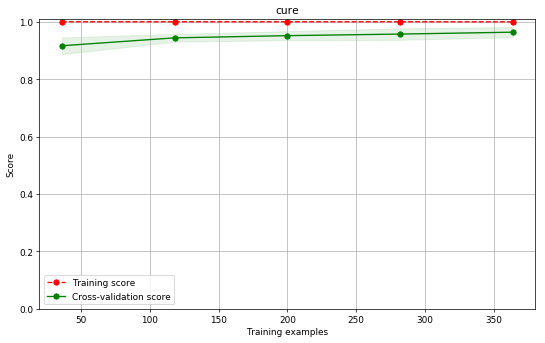

In [20]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
x = X_train
y = y_train
#画出data在某模型上的learning curve.
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None , n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#参数解释
    #estimator : 你用的分类器。
    #title : 表格的标题。
    #x: 输入的feature，numpy类型
    #y : 输入的target vector
    #ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    #cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)    
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(10,6),dpi=64)
plot_learning_curve(plt,model,"cure",x,y,ylim=(0.0,1.01),cv=cv)
plt.show()
